# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

Using TensorFlow backend.


In [2]:
DATA_PATH = Path('../data/')

## Options

In [4]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)

In [5]:
n_models = 10
patience = 2
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [6]:
with open(DATA_PATH/'input_pipe.pkl', 'rb') as fin:
    input_pipe = pickle.load(fin)

In [7]:
train_fy = RotationReflectionFold(train_feats, h5py.File(DATA_PATH/'train.hdf5', "r+"),
                                  input_pipe=input_pipe, rot_mult=16)

## Determine LR

2 classes found, running in binary mode



/Users/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 11.898s 


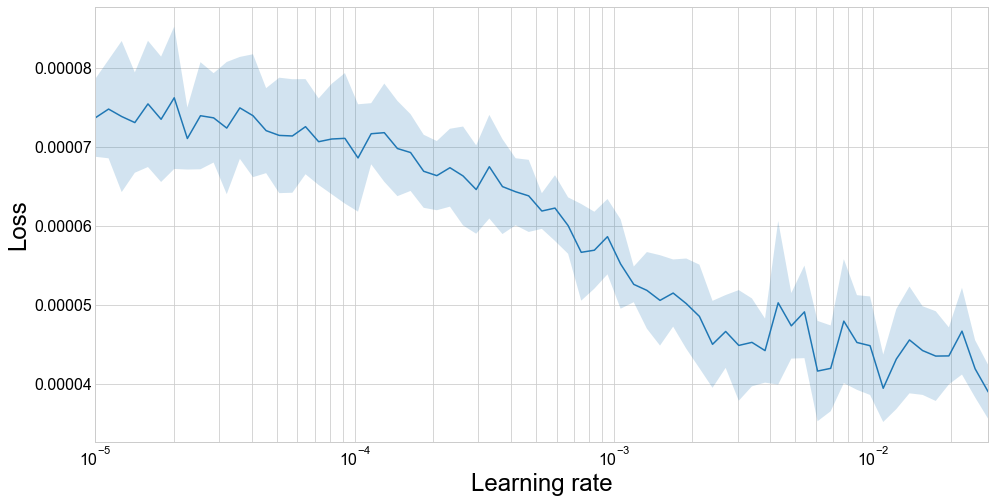

______________________________________



In [8]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [9]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'CosAnnealLR':{'cycle_mult':2, 'reverse':False, 'redux_decay':True}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using cosine LR annealing
2 classes found, running in binary mode

1 New best found: 3.9889696691534484e-05
2 New best found: 3.74414627905935e-05
3 New best found: 3.609691951569402e-05
5 New best found: 3.478861979820067e-05
6 New best found: 3.451324523339281e-05
7 New best found: 3.438483703212114e-05
11 New best found: 3.415887107839808e-05
12 New best found: 3.377487112302333e-05
13 New best found: 3.3463411724369504e-05
14 New best found: 3.3379793181666174e-05
15 New best found: 3.3356856415048243e-05
25 New best found: 3.2973782756744185e-05
26 New best found: 3.287955993873766e-05
28 New best found: 3.284917392156785e-05
30 New best found: 3.282334276009351e-05
31 New best found: 3.28179333533626e-05
43 New best found: 3.279103169188602e-05
47 New best found: 3.2787436360376885e-05
48 New best found: 3.2566017196222676e-05
51 New best found: 3.240858413191745e-05
55 New best found: 3.227259155246429e-05
58 New best found: 3.2255510

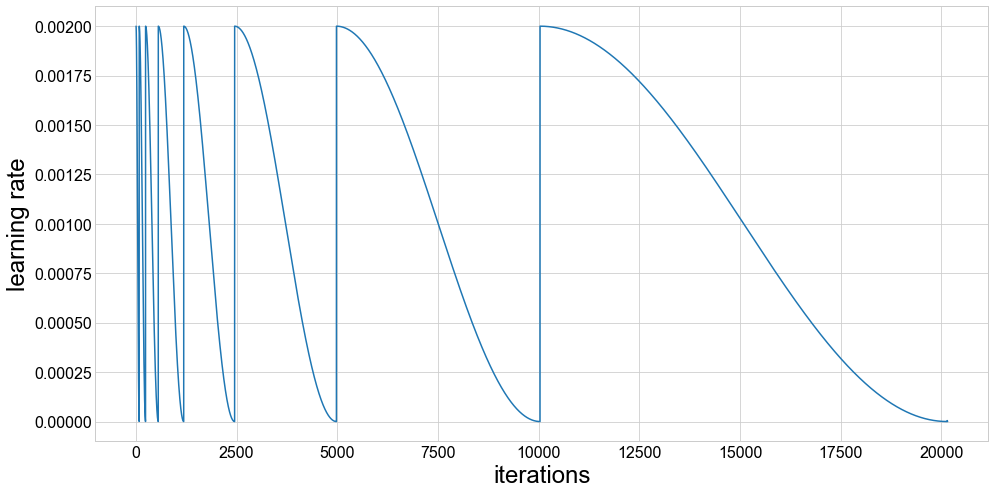

Fold took 149.576s

Training model 2 / 10
Using cosine LR annealing
1 New best found: 3.8365532840543894e-05
2 New best found: 3.548526440281421e-05
3 New best found: 3.477895274409093e-05
4 New best found: 3.4261988334765194e-05
5 New best found: 3.3828476734925064e-05
6 New best found: 3.3363995220861395e-05
7 New best found: 3.328880258341087e-05
11 New best found: 3.2812587643275034e-05
13 New best found: 3.2616091692761986e-05
14 New best found: 3.2376521169499026e-05
15 New best found: 3.233220987312961e-05
23 New best found: 3.198503542080289e-05
24 New best found: 3.1868689933617135e-05
25 New best found: 3.180007808623486e-05
26 New best found: 3.168154774175491e-05
28 New best found: 3.164446208829759e-05
29 New best found: 3.1607767239620446e-05
30 New best found: 3.159685216232902e-05
31 New best found: 3.1596163360518405e-05
46 New best found: 3.15543448596145e-05
48 New best found: 3.153422124451026e-05
49 New best found: 3.150932702119462e-05
51 New best found: 3.1417358

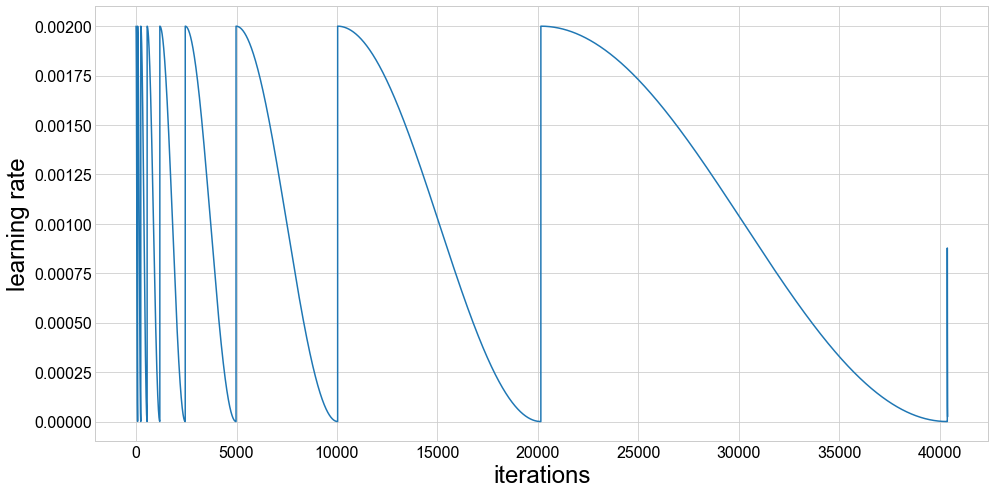

Fold took 311.076s

Training model 3 / 10
Using cosine LR annealing
1 New best found: 4.073338385060197e-05
2 New best found: 3.819784265215276e-05
3 New best found: 3.700958790286677e-05
4 New best found: 3.675171791692264e-05
5 New best found: 3.638478934590239e-05
6 New best found: 3.557373670337256e-05
7 New best found: 3.546921541419579e-05
9 New best found: 3.535811977781123e-05
11 New best found: 3.516520363918971e-05
12 New best found: 3.4655072299938185e-05
13 New best found: 3.439171658683335e-05
14 New best found: 3.43782960480894e-05
15 New best found: 3.4336767667264213e-05
22 New best found: 3.4299527398252394e-05
23 New best found: 3.409440333416569e-05
24 New best found: 3.3863084748736584e-05
26 New best found: 3.3673399194231024e-05
27 New best found: 3.358026470523328e-05
28 New best found: 3.3534343190694926e-05
29 New best found: 3.3511452010134236e-05
30 New best found: 3.347061767053674e-05
31 New best found: 3.346380128350575e-05
45 New best found: 3.33627242041

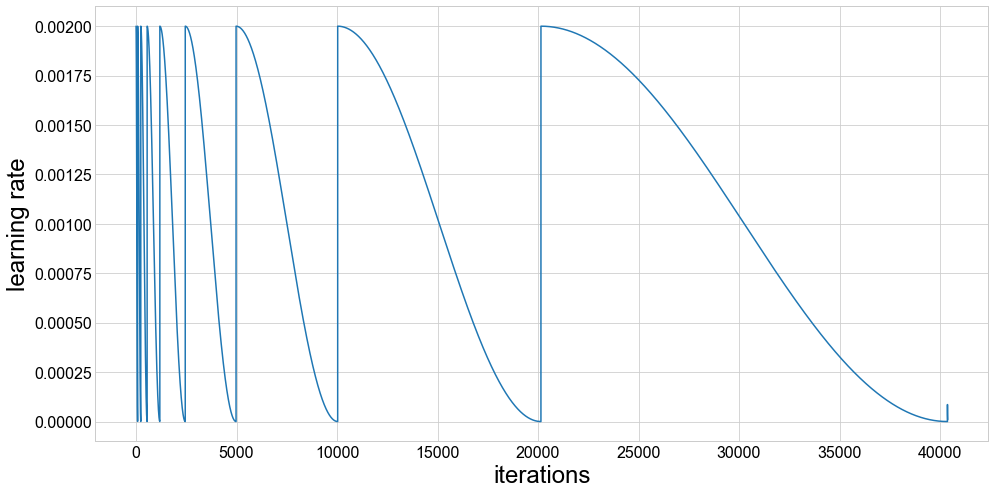

Fold took 320.548s

Training model 4 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103878). Check your callbacks.
  % delta_t_median)


1 New best found: 3.9829121473840834e-05
2 New best found: 3.6525308921870066e-05
3 New best found: 3.601864723753104e-05
4 New best found: 3.578870236295229e-05
5 New best found: 3.548884257711189e-05
6 New best found: 3.4667753927599176e-05
7 New best found: 3.4545499795594304e-05
10 New best found: 3.4373037840303486e-05
11 New best found: 3.3912625809436766e-05
12 New best found: 3.3731911158358994e-05
13 New best found: 3.361188228875981e-05
14 New best found: 3.345115530654666e-05
15 New best found: 3.342846119697766e-05
23 New best found: 3.326475780372674e-05
25 New best found: 3.300830346083929e-05
26 New best found: 3.293842620243548e-05
27 New best found: 3.282714245311427e-05
28 New best found: 3.273673740798424e-05
29 New best found: 3.269960594425541e-05
30 New best found: 3.269469634984474e-05
31 New best found: 3.269457659734444e-05
43 New best found: 3.2613932173005575e-05
49 New best found: 3.255169022332192e-05
51 New best found: 3.23474832102002e-05
52 New best foun

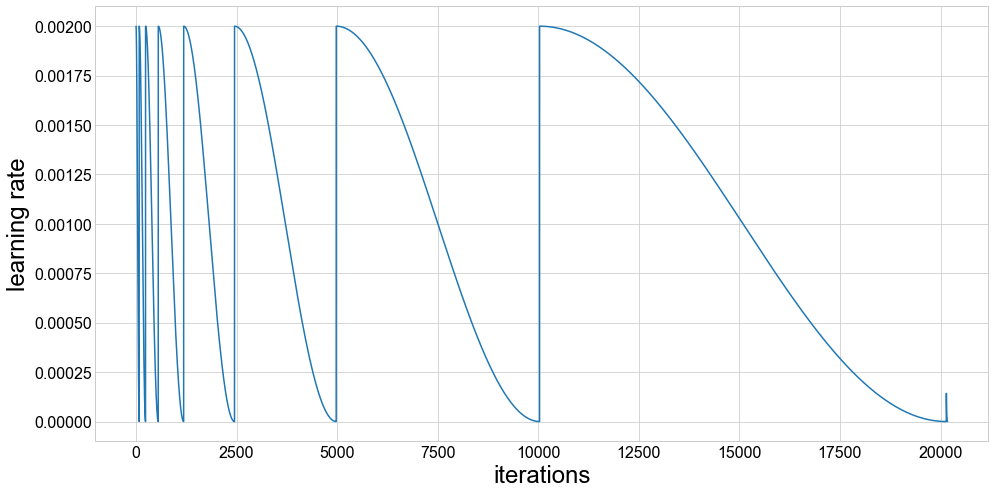

Fold took 178.052s

Training model 5 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119315). Check your callbacks.
  % delta_t_median)


1 New best found: 4.002370631781028e-05
2 New best found: 3.6629901321904425e-05
3 New best found: 3.561443082857352e-05
5 New best found: 3.4991141088107523e-05
6 New best found: 3.476984749830173e-05
7 New best found: 3.4490607061503087e-05
9 New best found: 3.428171921572802e-05
11 New best found: 3.4005070637184365e-05
12 New best found: 3.356159439014294e-05
13 New best found: 3.3284382589212334e-05
14 New best found: 3.3193689258101046e-05
15 New best found: 3.318721386183527e-05
22 New best found: 3.301735981272179e-05
23 New best found: 3.291106557131926e-05
24 New best found: 3.287182329085838e-05
25 New best found: 3.262800757919306e-05
27 New best found: 3.254960599507608e-05
28 New best found: 3.2440573516023166e-05
30 New best found: 3.238998679139971e-05
31 New best found: 3.238538924970499e-05
48 New best found: 3.2281150882352136e-05
50 New best found: 3.225888092013841e-05
51 New best found: 3.216530693739463e-05
53 New best found: 3.215485965365945e-05
54 New best fou

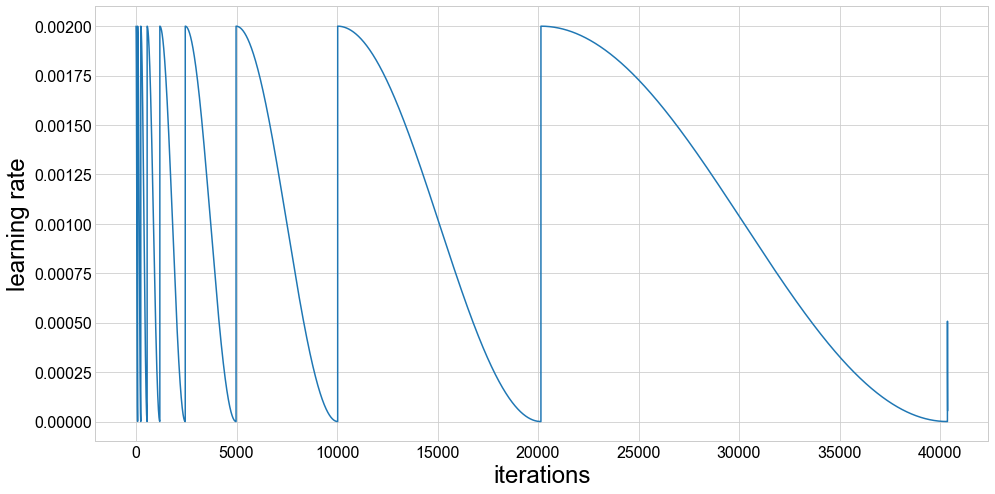

Fold took 320.963s

Training model 6 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.114075). Check your callbacks.
  % delta_t_median)


1 New best found: 4.020276237715734e-05
2 New best found: 3.728309267025907e-05
3 New best found: 3.659961985395057e-05
5 New best found: 3.569693511672085e-05
6 New best found: 3.539880523312604e-05
7 New best found: 3.5256816892069765e-05
10 New best found: 3.503005404927535e-05
11 New best found: 3.491913581237896e-05
12 New best found: 3.438968686386943e-05
13 New best found: 3.433644844189985e-05
14 New best found: 3.397717816696968e-05
15 New best found: 3.3972767944214864e-05
24 New best found: 3.3722158074670005e-05
26 New best found: 3.356504004332237e-05
27 New best found: 3.3451783259806686e-05
28 New best found: 3.331022955244407e-05
29 New best found: 3.32912588637555e-05
44 New best found: 3.3230634934443515e-05
51 New best found: 3.310633734217845e-05
55 New best found: 3.3098198498191775e-05
56 New best found: 3.296328186115716e-05
59 New best found: 3.2935936212015805e-05
93 New best found: 3.288811390375486e-05
95 New best found: 3.284281400119653e-05
100 New best fou

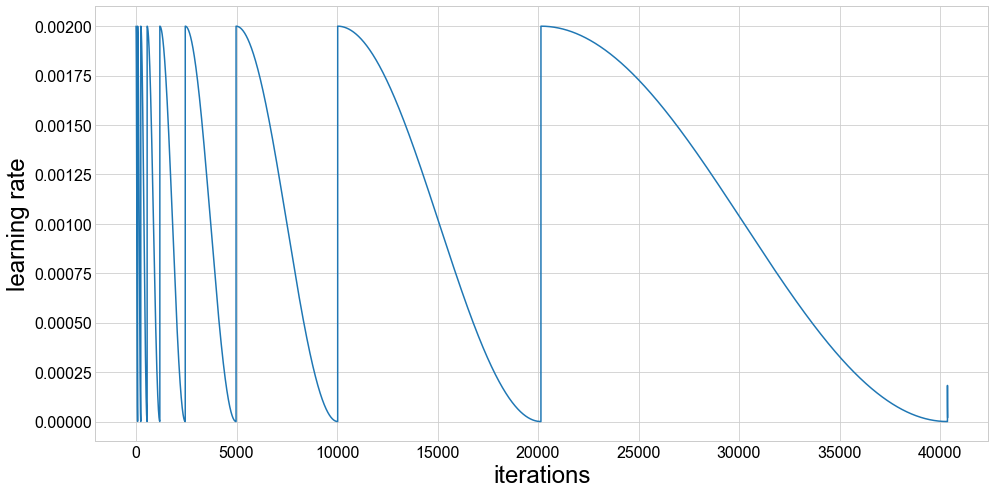

Fold took 328.730s

Training model 7 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.124410). Check your callbacks.
  % delta_t_median)


1 New best found: 3.946625252681579e-05
2 New best found: 3.6304929952922465e-05
3 New best found: 3.585496642447184e-05
4 New best found: 3.547546641865793e-05
5 New best found: 3.485484075584715e-05
6 New best found: 3.4300978835429926e-05
7 New best found: 3.4197326299449975e-05
9 New best found: 3.414852252688387e-05
10 New best found: 3.40716995195089e-05
11 New best found: 3.359812761973396e-05
12 New best found: 3.3579585743654255e-05
13 New best found: 3.337546371724054e-05
14 New best found: 3.3239592194246147e-05
23 New best found: 3.311392812888785e-05
24 New best found: 3.287299443489342e-05
26 New best found: 3.2833262601798585e-05
27 New best found: 3.268237897726562e-05
28 New best found: 3.267189739995469e-05
29 New best found: 3.255052885419743e-05
47 New best found: 3.25186858801883e-05
49 New best found: 3.2486468306872157e-05
51 New best found: 3.221739811814803e-05
53 New best found: 3.218419871048867e-05
55 New best found: 3.215159017178145e-05
56 New best found: 

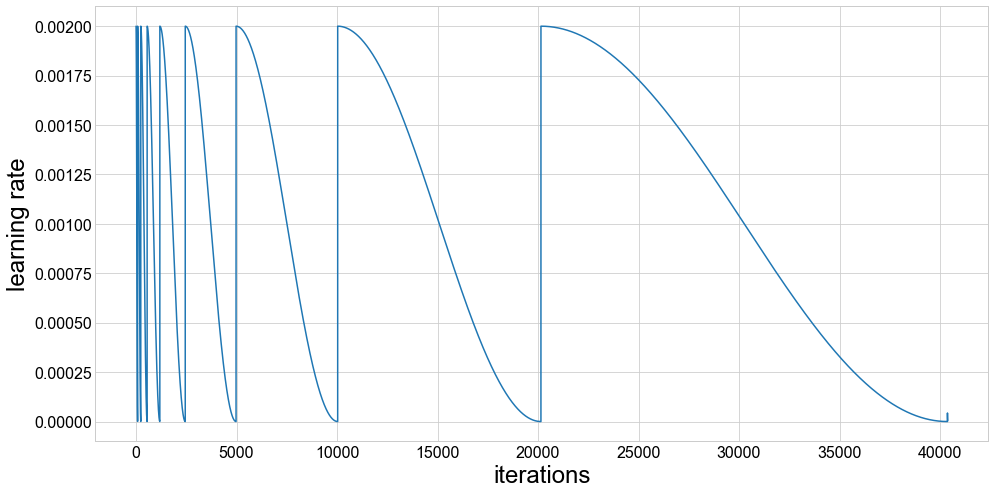

Fold took 346.346s

Training model 8 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132898). Check your callbacks.
  % delta_t_median)


1 New best found: 3.995108103268535e-05
2 New best found: 3.744984276132842e-05
3 New best found: 3.652637934228432e-05
4 New best found: 3.619590055230173e-05
5 New best found: 3.556399104176112e-05
6 New best found: 3.492972589913706e-05
7 New best found: 3.481421199588675e-05
10 New best found: 3.4696172598690434e-05
11 New best found: 3.449519962561438e-05
12 New best found: 3.4129179341242335e-05
14 New best found: 3.39875154068033e-05
15 New best found: 3.3953172087984255e-05
23 New best found: 3.373152520131298e-05
25 New best found: 3.3678475735429944e-05
26 New best found: 3.3604060039172465e-05
27 New best found: 3.340236672507401e-05
28 New best found: 3.326744670649281e-05
48 New best found: 3.322688187572315e-05
49 New best found: 3.3177242654363065e-05
50 New best found: 3.312849228125975e-05
54 New best found: 3.29061191013715e-05
55 New best found: 3.290022921522604e-05
59 New best found: 3.288975333842164e-05
60 New best found: 3.283806609308883e-05
61 New best found: 

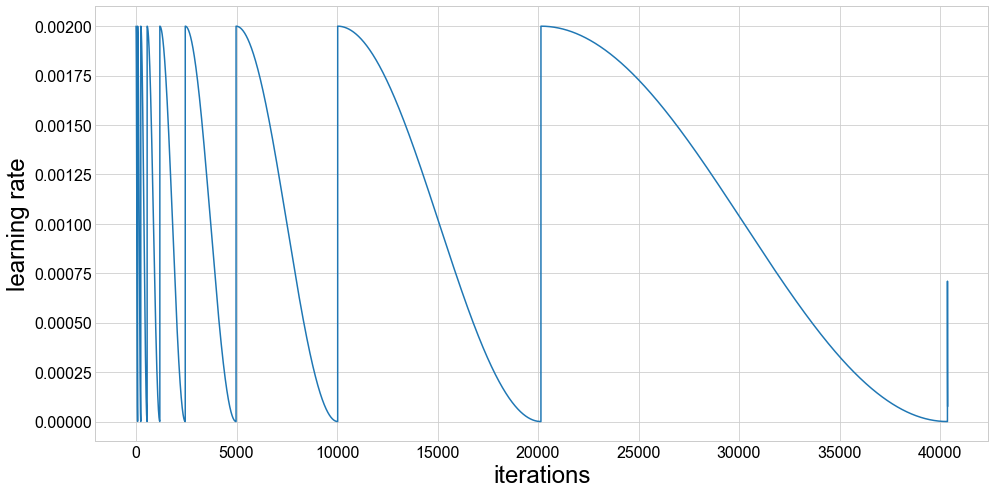

Fold took 355.286s

Training model 9 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.282738). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141690). Check your callbacks.
  % delta_t_median)


1 New best found: 3.948614636244376e-05
2 New best found: 3.654387181625289e-05
3 New best found: 3.6116322101743055e-05
4 New best found: 3.6039048592511727e-05
5 New best found: 3.5039097741951354e-05
6 New best found: 3.473025654837281e-05
7 New best found: 3.458055724957872e-05
10 New best found: 3.429664835290815e-05
12 New best found: 3.367402163813289e-05
13 New best found: 3.346259376108101e-05
14 New best found: 3.337922474482943e-05
15 New best found: 3.335411478362681e-05
23 New best found: 3.322045273957578e-05
24 New best found: 3.316938648924265e-05
25 New best found: 3.298432059536804e-05
26 New best found: 3.298198642180169e-05
27 New best found: 3.2915907183874536e-05
28 New best found: 3.271777764607774e-05
29 New best found: 3.2655762996358665e-05
45 New best found: 3.2624448229481544e-05
47 New best found: 3.2543835211562166e-05
49 New best found: 3.250167056635474e-05
50 New best found: 3.2391241487816664e-05
52 New best found: 3.235397369702311e-05
55 New best fou

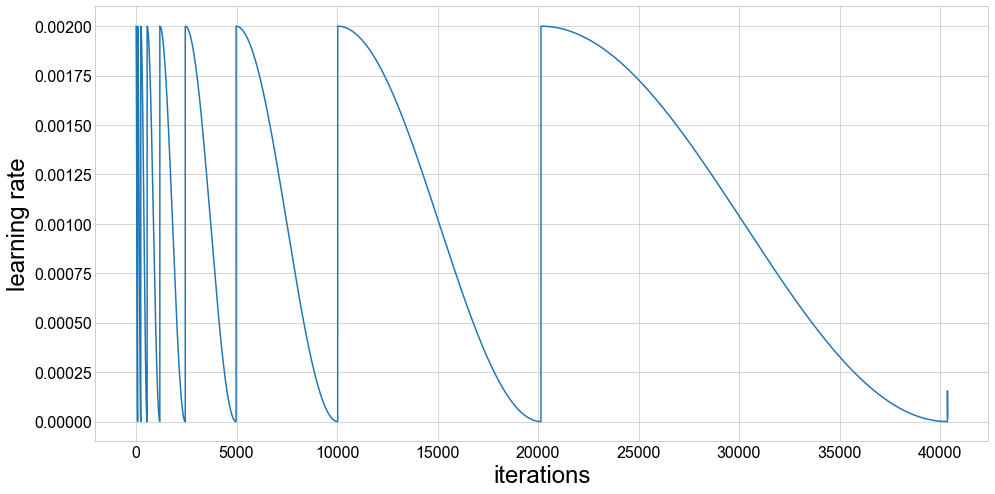

Fold took 352.652s

Training model 10 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.299866). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150486). Check your callbacks.
  % delta_t_median)


1 New best found: 3.937328094071827e-05
2 New best found: 3.698396844589968e-05
3 New best found: 3.5962376435739024e-05
4 New best found: 3.5912708522692154e-05
5 New best found: 3.473079696828375e-05
6 New best found: 3.439495451313742e-05
7 New best found: 3.422788078573458e-05
10 New best found: 3.4216171907195075e-05
11 New best found: 3.402281607949995e-05
12 New best found: 3.346788912155017e-05
13 New best found: 3.3278650492464895e-05
14 New best found: 3.3161030969456075e-05
15 New best found: 3.31547035159943e-05
22 New best found: 3.309810508323591e-05
23 New best found: 3.282031775638645e-05
25 New best found: 3.2772757767645084e-05
26 New best found: 3.265922092965258e-05
27 New best found: 3.259541240290442e-05
28 New best found: 3.2569158240957805e-05
29 New best found: 3.252378276144216e-05
30 New best found: 3.248128902828156e-05
31 New best found: 3.247841811418622e-05
49 New best found: 3.240101312233854e-05
50 New best found: 3.2292963514959416e-05
54 New best foun

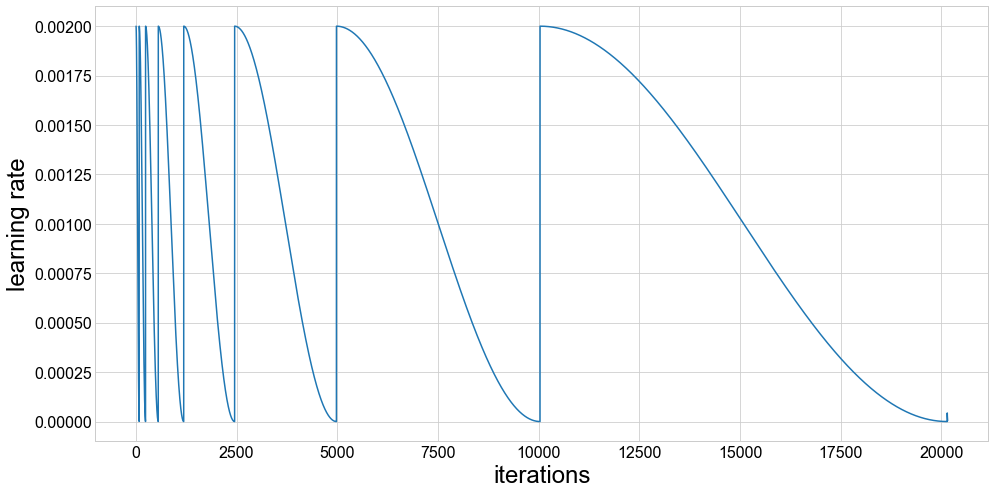

Fold took 181.736s


______________________________________
Training finished
Cross-validation took 2848.603s 


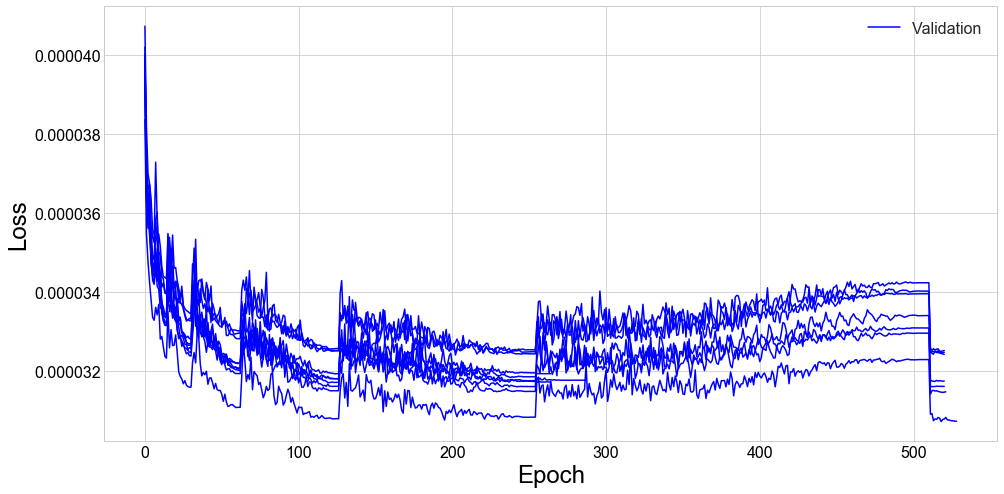

Mean loss = 3.18e-05 +- 2e-07
Mean wAUC = 0.0636 +- 0.0006
Mean AUC = 0.0988 +- 0.0005
Mean AMS = 3.9 +- 0.05
Mean cut = 0.962 +- 0.006
______________________________________



<Figure size 432x288 with 0 Axes>

In [10]:
results, histories = fold_train_model(train_fy, n_models,
                                      model_gen_params=model_gen_params,
                                      train_params=train_params, train_on_weights=True,
                                      use_callbacks=use_callbacks, ams_args=ams_args,
                                      max_epochs=max_epochs, patience=patience,
                                      verbose=1, plots=plots)

The impact of data augmentation is pretty clear. Comparing the training here to that of the the CRL Swish model without augmentation we can see that we effectively gain another LR cycles worth of training epochs before we start overfitting, which allows the networks to reach much lower looses (3.18e-5 c.f. 3.23e-5) and a higher AMSs (3.98 c.f. 3.71)

## Construct ensemble

In [11]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [13]:
from hepml_tools.general.ensemble_functions import assemble_ensemble

In [14]:
ensemble, weights = assemble_ensemble(results, ensemble_size, ensemble_mode, compile_args)

Choosing ensemble by loss
Model 0 is 1 with loss = 3.072532586375018e-05
Model 1 is 4 with loss = 3.141783624779573e-05
Model 2 is 6 with loss = 3.160453536757482e-05
Model 3 is 9 with loss = 3.171028749956467e-05
Model 4 is 8 with loss = 3.173260291223953e-05
Model 5 is 3 with loss = 3.176961552866561e-05
Model 6 is 0 with loss = 3.193491355050355e-05
Model 7 is 7 with loss = 3.2409412258576134e-05
Model 8 is 5 with loss = 3.2425349164986985e-05
Model 9 is 2 with loss = 3.2467496096069226e-05


## Response on validation data without TTA

In [15]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [16]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0012331636977993186s per sample

Predicting fold 2 out of 10
Prediction took 0.00020812313979840836s per sample

Predicting fold 3 out of 10
Prediction took 0.00020531064420065376s per sample

Predicting fold 4 out of 10
Prediction took 0.00020699651300092227s per sample

Predicting fold 5 out of 10
Prediction took 0.00021639193700102624s per sample

Predicting fold 6 out of 10
Prediction took 0.0002113089934020536s per sample

Predicting fold 7 out of 10
Prediction took 0.00020928326080029366s per sample

Predicting fold 8 out of 10
Prediction took 0.00020290733400033786s per sample

Predicting fold 9 out of 10
Prediction took 0.00021123739939939696s per sample

Predicting fold 10 out of 10
Prediction took 0.0002237653730000602s per sample



In [17]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source)),
                                                           roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source), sample_weight=get_feature('weights', val_fy.source))))

Testing ROC AUC: unweighted 0.9037038480795556, weighted 0.9360338574066521


In [18]:
ams_scan_slow(convert_to_df(val_fy.source), br=10, w_factor=250000/50000)

50000 candidates loaded


(3.981000383472205, 0.9632386)

In [19]:
%%time
bootstrap_mean_calc_ams(convert_to_df(val_fy.source), br=10, w_factor=250000/50000, N=512)

50000 candidates loaded

Mean calc_ams=4.0+-0.2, at mean cut of 0.96+-0.01
Exact mean cut 0.9610517785185948, corresponds to calc_ams of 3.930491028247699
CPU times: user 3.42 s, sys: 5.36 s, total: 8.78 s
Wall time: 1min 36s


(4.0, 0.96)

With test-time augmentation we improve on 4_Model_Swish_Cyclical-LR in all metrics on validation data: overall AMS 3.77->3.90, AMS corresponding to mean cut 3.72->3.89.

## Response on validation data with TTA

In [20]:
val_fy = RotationReflectionFold(train_feats, h5py.File(DATA_PATH/'val.hdf5', "r+"), input_pipe=input_pipe,
                                  rotate = True, reflect = True, rot_mult=8)

In [21]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.008038072099999408s per sample

Predicting fold 2 out of 10
Prediction took 0.006901751512600458s per sample

Predicting fold 3 out of 10
Prediction took 0.007000517597599537s per sample

Predicting fold 4 out of 10
Prediction took 0.007311503478401573s per sample

Predicting fold 5 out of 10
Prediction took 0.007573590572399553s per sample

Predicting fold 6 out of 10
Prediction took 0.007437637375999475s per sample

Predicting fold 7 out of 10
Prediction took 0.007368822241600719s per sample

Predicting fold 8 out of 10
Prediction took 0.007200532995397225s per sample

Predicting fold 9 out of 10
Prediction took 0.0076157862040010516s per sample

Predicting fold 10 out of 10
Prediction took 0.0071379983084014385s per sample



In [22]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source)),
                                                           roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source), sample_weight=get_feature('weights', val_fy.source))))

Testing ROC AUC: unweighted 0.9039706985371406, weighted 0.9360668969807526


In [23]:
ams_scan_slow(convert_to_df(val_fy.source), br=10, w_factor=250000/50000)

50000 candidates loaded


(4.002211842383278, 0.9626147)

In [24]:
%%time
bootstrap_mean_calc_ams(convert_to_df(val_fy.source), br=10, w_factor=250000/50000, N=512)

50000 candidates loaded

Mean calc_ams=4.0+-0.2, at mean cut of 0.961+-0.008
Exact mean cut 0.9613511364441365, corresponds to calc_ams of 3.9951681130919012
CPU times: user 3.49 s, sys: 5.46 s, total: 8.95 s
Wall time: 1min 37s


(4.0, 0.961)

Adding test-time augmentation provides further benefits: overall AMS 3.90->3.97, AMS corresponding to mean cut 3.89->3.91.

# Test scoring - Without TTA

In [25]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [26]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.00023402257438177583s per sample

Predicting fold 2 out of 10
Prediction took 0.00020313759880002843s per sample

Predicting fold 3 out of 10
Prediction took 0.0001989896698727865s per sample

Predicting fold 4 out of 10
Prediction took 0.0002001794112907109s per sample

Predicting fold 5 out of 10
Prediction took 0.00019911870852731887s per sample

Predicting fold 6 out of 10
Prediction took 0.00019870449554529676s per sample

Predicting fold 7 out of 10
Prediction took 0.00020516734561798247s per sample

Predicting fold 8 out of 10
Prediction took 0.00021163704081819478s per sample

Predicting fold 9 out of 10
Prediction took 0.0001974565985456469s per sample

Predicting fold 10 out of 10
Prediction took 0.00019948592663647353s per sample

CPU times: user 2min 7s, sys: 13.8 s, total: 2min 21s
Wall time: 1min 52s


In [27]:
score_test_data(test_fy.source, 0.9610517785185948)

Public:Private AMS: 3.698878304739762 : 3.76381258417914


(3.698878304739762, 3.76381258417914)

Using the cuts we optimised by bootstrapping the validation data, we end up with a private score which would have beaten the winning entry (3.817 c.f. 3.806). It would be nice if the public score were higher, though.

# Test scoring - With TTA

In [28]:
test_fy = RotationReflectionFold(train_feats, h5py.File(DATA_PATH/'testing.hdf5', "r+"), input_pipe=input_pipe,
                                   rotate = True, reflect = True, rot_mult=8)

In [29]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.006526143338381768s per sample

Predicting fold 2 out of 10
Prediction took 0.006635879015381744s per sample

Predicting fold 3 out of 10
Prediction took 0.006895990868908914s per sample

Predicting fold 4 out of 10
Prediction took 0.006495489768145489s per sample

Predicting fold 5 out of 10
Prediction took 0.006438383673090721s per sample

Predicting fold 6 out of 10
Prediction took 0.006439000718854632s per sample

Predicting fold 7 out of 10
Prediction took 0.006498110776654424s per sample

Predicting fold 8 out of 10
Prediction took 0.006599758643509069s per sample

Predicting fold 9 out of 10
Prediction took 0.006685913195872722s per sample

Predicting fold 10 out of 10
Prediction took 0.006592083096890763s per sample

CPU times: user 1h 7min 47s, sys: 7min 18s, total: 1h 15min 6s
Wall time: 1h 19s


In [30]:
score_test_data(test_fy.source, 0.9613511364441365)

Public:Private AMS: 3.663333194303158 : 3.8021700839162897


(3.663333194303158, 3.8021700839162897)

In [38]:
score_test_data(test_fy.source, 0.9614)

Public:Private AMS: 3.656476900840482 : 3.8042613286658944


(3.656476900840482, 3.8042613286658944)

Using the cuts we optimised by bootstrapping the validation data, we end up with a private score which would have beaten the winning entry (3.817 c.f. 3.806). It would be nice if the public score were higher, though.

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)